# Mettre en place notre environnement
________

La première chose que nous devons faire est de charger les bibliothèques et les ensembles de données que nous allons utiliser. Pour aujourd'hui, nous allons travailler avec deux ensembles de données : un contenant des chroniques de température dans le lit de la rivière (zone hyporhéique), et un autre contenant des les chroniques de différence de charge enregistré en **Volt**.

**Important!** Assurez-vous d'exécuter cette cellule vous-même ou le reste de votre code ne fonctionnera pas

In [1]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

etalonage_capteur_riv = pd.read_csv("C:/Users/guill/Documents/Etudes/Mines/2A/T3/Molonari/Flux d'eau et d'énergie/MOLONARI_1D_RESOURCES/configuration/pressure_sensors\P508.csv")

# set seed for reproducibility
np.random.seed(0)

Nous sommes maintenant prêts à examiner quelques dates ! (Si vous le souhaitez, vous pouvez profiter de cette occasion pour jeter un coup d'œil à certaines des données).

# Imprimez le noms des colonnes
renommer les colonnes du fichier capteur_riviere :  	dates,tension_V,temperature_stream_C et celles du fichier capteur_ZH  :
#,dates,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C



In [2]:
# read in our data
capteur_riviere = pd.read_csv("C:/Users/guill/Documents/Etudes/Mines/2A/T3/Molonari/Flux d'eau et d'énergie/MOLONARI_1D_RESOURCES/sampling_points/Point034/point034_P_measures.csv",
                            sep = ',', header = 0, names = ['dates', 'tension_V', 'temperature_stream_C'], usecols = [1, 2, 3], skiprows=1)
capteur_ZH = pd.read_csv("C:/Users/guill/Documents/Etudes/Mines/2A/T3/Molonari/Flux d'eau et d'énergie/MOLONARI_1D_RESOURCES/sampling_points/Point034/point034_T_measures.csv",
                            sep = ',', header = 0, names = ['dates', 'temperature_depth_1_C', 'temperature_depth_2_C', 'temperature_depth_3_C', 'temperature_depth_4_C'], usecols = [1, 2, 3, 4, 5], skiprows=1)

In [3]:
capteur_riviere.head()

,dates,tension_V,temperature_stream_C
0,06/27/16 12:00:00 PM,1.26787,18.342
1,06/27/16 12:15:00 PM,1.06630,13.898
2,06/27/16 12:30:00 PM,1.20661,13.915
3,06/27/16 12:45:00 PM,1.24533,13.939
4,06/27/16 01:00:00 PM,1.24437,13.967


In [4]:
capteur_ZH.head()

,dates,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C
0,06/27/16 12:00:00 PM,13.810,13.834,13.858,13.810
1,06/27/16 12:15:00 PM,13.834,13.858,13.882,13.834
2,06/27/16 12:30:00 PM,13.930,13.954,14.050,14.002
3,06/27/16 12:45:00 PM,13.882,13.954,14.026,13.954
4,06/27/16 01:00:00 PM,13.858,13.930,14.026,13.954


# Transformez les données de différence de charge en mètres



In [5]:
etalonage_capteur_riv

,Sensor_Name,P508
0,Datalogger,Hobo
1,Calibration_Date,2016/01/12 10:10:10
2,Intercept,1.210344
3,dU/dH,-1.462495
4,dU/dT,0.001474
5,Sigma_Meas_P,0.01


In [6]:
U0, dUdH, dUdT = float(etalonage_capteur_riv['P508'].iloc[2]), float(etalonage_capteur_riv['P508'].iloc[3]), float(etalonage_capteur_riv['P508'].iloc[4])
print(U0, dUdH, dUdT)

1.210344 -1.462495 0.001474


On a :
$$
U = U_0 + \frac{dU}{dH} \Delta H + \frac{dU}{dT} T
$$
Donc :
$$
\Delta H = \frac{1}{dU/dH} \cdot (U-U_0 - \frac{dU}{dT} T)
$$

On ajoute alors une colonne ```diff_charge``` dans le tableau, issu d'une combinaison des deux autres colonnes.

In [7]:
capteur_riviere['diff_charge'] = (1/dUdH) * (capteur_riviere['tension_V'] - U0 - dUdT*capteur_riviere['temperature_stream_C'])
capteur_riviere.head()

,dates,tension_V,temperature_stream_C,diff_charge
0,06/27/16 12:00:00 PM,1.26787,18.342,-0.020848
1,06/27/16 12:15:00 PM,1.06630,13.898,0.112499
2,06/27/16 12:30:00 PM,1.20661,13.915,0.016578
3,06/27/16 12:45:00 PM,1.24533,13.939,-0.009873
4,06/27/16 01:00:00 PM,1.24437,13.967,-0.009189


# Traitement des dates
## Vérifiez le type de données de notre colonne de date
___

Imprimer les dates des deux fichiers

In [8]:
capteur_riviere['dates']

0       06/27/16 12:00:00 PM
1       06/27/16 12:15:00 PM
2       06/27/16 12:30:00 PM
3       06/27/16 12:45:00 PM
4       06/27/16 01:00:00 PM
                ...         
1455        07/12/2016 15:45
1456        07/12/2016 16:00
1457        07/12/2016 16:15
1458        07/12/2016 16:30
1459        07/12/2016 16:45
Name: dates, Length: 1460, dtype: object

In [9]:
capteur_ZH['dates']

0       06/27/16 12:00:00 PM
1       06/27/16 12:15:00 PM
2       06/27/16 12:30:00 PM
3       06/27/16 12:45:00 PM
4       06/27/16 01:00:00 PM
                ...         
1433    07/12/16 10:15:00 AM
1434    07/12/16 10:30:00 AM
1435    07/12/16 10:45:00 AM
1436    07/12/16 10:49:31 AM
1437    07/12/16 10:49:47 AM
Name: dates, Length: 1438, dtype: object

## Convertir nos colonnes de date en datetime
___

Maintenant que nous savons que notre colonne de date n'est pas reconnue comme une date, il est temps de la convertir pour qu'elle soit reconnue comme une date. Cette opération est appelée "analyse syntaxique des dates" car nous prenons une chaîne de caractères et identifions ses composants. Nous allons utiliser la fonction pd.to_datetime.

Nous pouvons indiquer à pandas le format de nos dates à l'aide d'un guide appelé ["strftime directive", sur lequel vous trouverez plus d'informations à ce lien] (http://strftime.org/). L'idée de base est que vous devez indiquer quelles parties de la date se trouvent où et quelle ponctuation se trouve entre elles. Il existe [de nombreuses parties possibles d'une date](http://strftime.org/), mais les plus courantes sont `%d` pour le jour, `%m` pour le mois, `%y` pour une année à deux chiffres et `%Y` pour une année à quatre chiffres.

Quelques exemples :

 * Le 17 janvier 2007 a le format "%m/%d/%y".
 * 17-1-2007 a le format "%d-%m-%Y".
 

Remarquez qu'en bas de la sortie de `head()`, vous pouvez voir qu'il est dit que le type de données de cette colonne est "object". 

> Pandas utilise le dtype "object" pour stocker différents types de données, mais le plus souvent, lorsque vous voyez une colonne avec le dtype "object", elle contient des chaînes de caractères. 

Si vous consultez la documentation sur le dtype de Pandas [ici] (http://pandas.pydata.org/pandas-docs/stable/basics.html#dtypes), vous remarquerez qu'il existe également un dtype spécifique `datetime64`. Comme le dtype de notre colonne est `object` plutôt que `datetime64`, nous pouvons dire que Python ne sait pas que cette colonne contient des dates.

Nous pouvons aussi regarder uniquement le dtype de votre colonne sans imprimer les premières lignes si nous le souhaitons :

In [10]:
# check the data type of our date column
capteur_riviere['dates'].dtype

dtype('O')

You may have to check the [numpy documentation](https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.dtype.kind.html#numpy.dtype.kind) to match the letter code to the dtype of the object. "O" is the code for "object", so we can see that these two methods give us the same information.

Maintenant que nos dates sont analysées correctement, nous pouvons travailler avec celles-ci.

___
* Bien que nous spécifions le format de la date ici, il arrive parfois que vous rencontriez une erreur lorsque plusieurs formats de date sont présents dans une même colonne. Dans ce cas, vous pouvez demander à pandas de déduire le bon format de date. Vous pouvez le faire comme suit :

`capteur_riviere['date'] = pd.to_datetime(capteur_riviere['date'], infer_datetime_format=True)``

**Pourquoi ne pas toujours utiliser `infer_datetime_format = True?`** Il y a deux grandes raisons de ne pas toujours faire deviner à pandas le format de l'heure. La première est que pandas n'est toujours capable de trouver le bon format de date, surtout si quelqu'un a fait preuve de créativité dans la saisie des données. La seconde est que c'est beaucoup plus lent que de spécifier le format exact des dates.
____

In [11]:
capteur_riviere['dates'] = pd.to_datetime(capteur_riviere['dates'], infer_datetime_format=True)
capteur_ZH['dates'] = pd.to_datetime(capteur_ZH['dates'], infer_datetime_format=True)
capteur_riviere['dates']

0      2016-06-27 12:00:00
1      2016-06-27 12:15:00
2      2016-06-27 12:30:00
3      2016-06-27 12:45:00
4      2016-06-27 13:00:00
               ...        
1455   2016-07-12 15:45:00
1456   2016-07-12 16:00:00
1457   2016-07-12 16:15:00
1458   2016-07-12 16:30:00
1459   2016-07-12 16:45:00
Name: dates, Length: 1460, dtype: datetime64[ns]

## Tracer le jour du mois pour vérifier l'analyse de la date
___

L'un des plus grands dangers de l'analyse des dates est de mélanger les mois et les jours. La fonction to_datetime() a des messages d'erreur très utiles, mais il n'est pas inutile de vérifier que les jours du mois que nous avons extraits ont un sens. 

Pour ce faire, nous allons tracer un histogramme des jours du mois. Nous nous attendons à ce qu'il ait des valeurs entre 1 et 31 et, puisqu'il n'y a aucune raison de supposer que les glissements de terrain sont plus fréquents certains jours du mois que d'autres, une distribution relativement égale. (Avec un creux sur 31 car tous les mois n'ont pas 31 jours.) 

<AxesSubplot:>

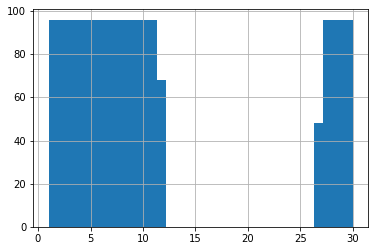

In [12]:
capteur_riviere['dates'].apply(lambda date : date.day).hist(bins=31)

On voit que les mesures ont commencé un 27 d'un mois pour se finir un 12 du mois suivant, sans irrégularité entre les deux. Les dates ont donc été correctement formattées.

# Valeurs aberrantes

L'un des plus grands défis du nettoyage des données est l'identification et le traitement des valeurs aberrantes. En termes simples, les valeurs aberrantes sont des observations qui sont significativement différentes des autres points de données. Même les meilleurs algorithmes d'estimation des paramètres automatique seront moins performants si les observations aberrantes ne sont pas nettoyées des données, car elles impliquent des simulations obsolètes des variables.



### Identification des valeurs aberrantes

La présence de valeurs aberrantes dans les données peut avoir de nombreuses raisons. Parfois, les valeurs aberrantes peuvent être authentiques, alors que dans d'autres cas, elles peuvent être dues à des erreurs de saisie de données. Il est important de comprendre les raisons des valeurs aberrantes avant de les nettoyer.

Nous allons commencer le processus de recherche des valeurs aberrantes en exécutant les statistiques sommaires sur les variables. Pour ce faire, nous utilisons la fonction describe() ci-dessous, qui fournit un résumé statistique de toutes les variables quantitatives.




In [13]:
capteur_ZH.describe()

,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C
count,1436.000000,1436.000000,1436.000000,1436.000000
mean,14.717557,14.502795,14.348946,14.097808
std,0.721799,0.531472,0.423288,0.328507
min,13.329000,13.642000,13.762000,13.690000
25%,14.146000,14.098000,14.050000,13.882000
50%,14.625000,14.409000,14.242000,14.002000
75%,15.127000,14.768000,14.505000,14.194000
max,17.320000,17.296000,17.034000,17.130000


On voit que les valeurs maximales sont étrangement élevées. On peut tracer les courbes pour les repérer.

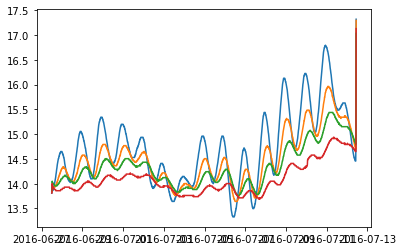

In [14]:
plt.plot(capteur_ZH['dates'],capteur_ZH['temperature_depth_1_C'])
plt.plot(capteur_ZH['dates'],capteur_ZH['temperature_depth_2_C'])
plt.plot(capteur_ZH['dates'],capteur_ZH['temperature_depth_3_C'])
plt.plot(capteur_ZH['dates'],capteur_ZH['temperature_depth_4_C'])

On remarque que les valeurs maximales sont atteintes à la fin, probablement quand le capteur a été récupéré. Cela se voit aussi avec la commande ```.tail()```, avec une valeur élevée et des cases vides.

In [15]:
capteur_ZH['temperature_depth_1_C'].tail()

1433    14.457
1434    15.008
1435    17.320
1436       NaN
1437       NaN
Name: temperature_depth_1_C, dtype: float64

On doit faire la même analyse avec la colonne ```diff_charge```, où on remarque aussi un minimum et un maximum trop éloignés de valeurs attendues pour un écart-type aussi faible.

In [16]:
capteur_riviere.describe()

,tension_V,temperature_stream_C,diff_charge
count,1460.000000,1460.000000,1460.000000
mean,1.256888,14.896441,-0.016812
std,0.047302,1.142397,0.032176
min,0.652670,9.066000,-0.140099
25%,1.246590,14.203750,-0.025327
50%,1.262150,14.818000,-0.020557
75%,1.270010,15.555000,-0.009784
max,1.432100,18.342000,0.390494


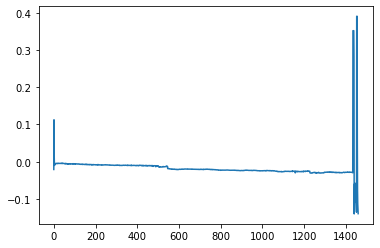

In [17]:
plt.plot(capteur_riviere['diff_charge'])

## Tracez les graphiques de distribution pour les différentes variables

#### 1. Box plot

Le box plot est une manière standardisée d'afficher la distribution des données sur la base du résumé en cinq chiffres (minimum, premier quartile (Q1), médiane, troisième quartile (Q3) et maximum). Elle est souvent utilisée pour identifier la distribution des données et détecter les valeurs aberrantes. La ligne de code ci-dessous trace le box plot de la variable numérique 'Loan_amount'. 

<AxesSubplot:>

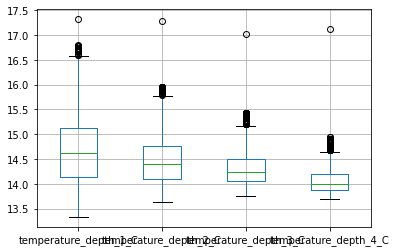

In [18]:
capteur_ZH.boxplot()

<AxesSubplot:>

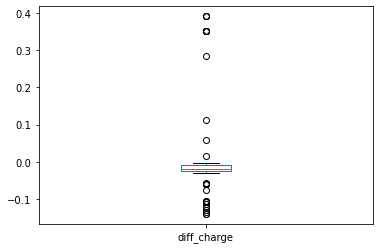

In [19]:
capteur_riviere['diff_charge'].plot.box()

Les boites à moustache montrent en effet les quelques valeurs aberrantes en dehors des quartiles extrémaux. On voit que pour les température, seul un point semble être problématique. Toutefois pour la différence de charge, il faudra supprimer une quinzaine de valeurs qui s'écartent de la distribution.

## 2. Histogramme

Un histogramme est utilisé pour visualiser la distribution d'une variable numérique. Une valeur aberrante apparaît en dehors du modèle général de distribution. La ligne de code ci-dessous trace un histogramme de la variable 'Revenu', en utilisant la fonction hist(). A histogram is used to visualize the distribution of a numerical variable. An outlier will appear outside the overall pattern of distribution. The line of code below plots a histogram of the 'Income' variable, using the hist() function. 

array([[<AxesSubplot:title={'center':'temperature_depth_1_C'}>,
        <AxesSubplot:title={'center':'temperature_depth_2_C'}>],
       [<AxesSubplot:title={'center':'temperature_depth_3_C'}>,
        <AxesSubplot:title={'center':'temperature_depth_4_C'}>]],
      dtype=object)

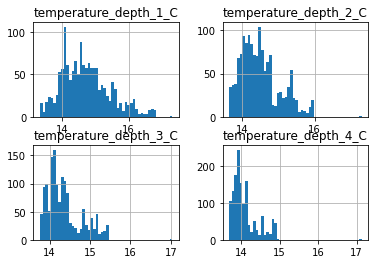

In [20]:
capteur_ZH.hist(['temperature_depth_1_C','temperature_depth_2_C','temperature_depth_3_C','temperature_depth_4_C'], bins=50)

<AxesSubplot:>

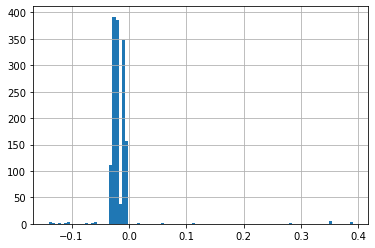

In [21]:
capteur_riviere['diff_charge'].hist(bins=100)

Les histogrammes montrent en effet, pour les températures, la seule valeur extrême autour de 17°C, éloignée du peloton. Par ailleurs, celui de la différence de charge met de nouveau en évidence plusieurs valeurs singulières et éloignées du pic central.

## 3. Scatterplot

Un nuage de points permet de visualiser la relation entre deux variables quantitatives. Les données sont affichées sous la forme d'une collection de points, et tout point qui ne correspond pas au regroupement général des deux variables peut indiquer des valeurs aberrantes. 

génèrez un nuage de points entre les différentes variables de températures. 



<AxesSubplot:xlabel='temperature_depth_1_C', ylabel='temperature_depth_2_C'>

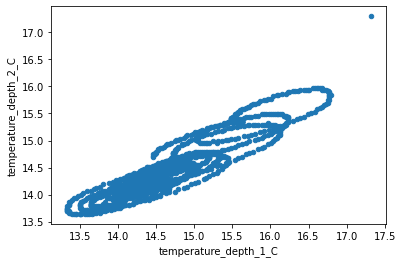

In [22]:
capteur_ZH.plot.scatter('temperature_depth_1_C', 'temperature_depth_2_C')

<AxesSubplot:xlabel='temperature_depth_1_C', ylabel='temperature_depth_3_C'>

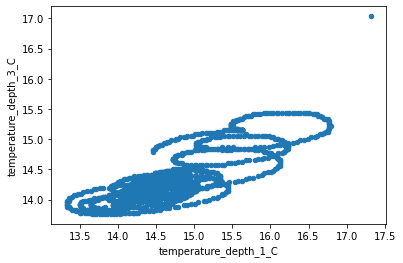

In [23]:
capteur_ZH.plot.scatter('temperature_depth_1_C', 'temperature_depth_3_C')

<AxesSubplot:xlabel='temperature_depth_1_C', ylabel='temperature_depth_4_C'>

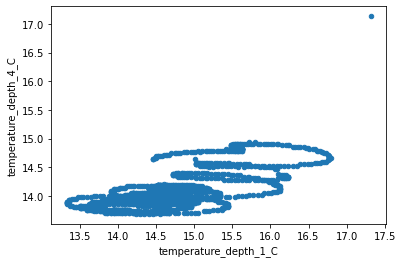

In [24]:
capteur_ZH.plot.scatter('temperature_depth_1_C', 'temperature_depth_4_C')

Le nuage de point est encore une belle manière de visualiser le point aberrant. Ce qui est pratique ici, c'est qu'on voit bien que le point est aberrant pour chaque mesure de température (il aurait pu être aberrant juste pour une seule mesure, mais là on voit bien que c'est le même point qui est à 17°C pour la température 1, 2, 3 et 4, et donc qu'une seule ligne est concernée).

## Identification des valeurs aberrantes avec l'écart interquartile (IQR)

L'écart interquartile (IQR) est une mesure de la dispersion statistique et est calculé comme la différence entre les 75e et 25e percentiles. Il est représenté par la formule IQR = Q3 - Q1. Les  lignes de code ci-dessous calculent et impriment l'écart interquartile pour chacune des variables de l'ensemble de données.  La règle générale est que tout ce qui n'est pas dans la plage de (Q1 - 1,5 IQR) et (Q3 + 1,5 IQR) est une valeur aberrante et peut être supprimé.


### Fonctions d'assistance

Ecrire des fonctions afin d'examiner chaque colonne des deux fichiers de données de terain et de calculer les 1er et 3e quartiles, l'intervalle inter-quartile et le minimum et le maximum. Toute valeur en dehors du minimum et du maximum est une valeur aberrante.

In [25]:
capteur_riviere.describe()

,tension_V,temperature_stream_C,diff_charge
count,1460.000000,1460.000000,1460.000000
mean,1.256888,14.896441,-0.016812
std,0.047302,1.142397,0.032176
min,0.652670,9.066000,-0.140099
25%,1.246590,14.203750,-0.025327
50%,1.262150,14.818000,-0.020557
75%,1.270010,15.555000,-0.009784
max,1.432100,18.342000,0.390494


In [26]:
def trouver_aberr(df, columns, alpha = 1.5):
    '''
    Renvoie une liste d'indices correspondant aux lignes aberrantes de toutes les colonnes.
    '''
    indices_aberr = []
    for column in columns :

        # calcul des statistiques
        Q1 = df.describe().loc['25%'][column]
        Q3 = df.describe().loc['75%'][column]
        IQR = Q3 - Q1

        # repérage des lignes aberrantes
        valeurs_aberr = df[column].loc[ (df[column]<Q1-alpha*IQR) | (df[column]>Q3+alpha*IQR) ]

        # récupération des indices
        indices_aberr += list(valeurs_aberr.index.values)

    return list(dict.fromkeys(indices_aberr)) # retirer les indices en double

In [27]:
len(trouver_aberr(capteur_ZH, ['temperature_depth_1_C','temperature_depth_2_C','temperature_depth_3_C','temperature_depth_4_C']))

152

In [28]:
len(trouver_aberr(capteur_riviere, ['diff_charge']))

28

Par cette méthode, on trouve 28 valeurs aberrantes pour la différence de charge, ce qui parait cohérent, mais 152 valeurs aberrantes pour les températures, alors qu'on s'attendait à en retirer une seule ! 

### Résolution de la distribution asymétrique…

A partir de nos données dans un histogramme, nous pouvons obtenir une distribution asymétrique des données. Une seule grande barre avec de minuscules barres à gauche ou à droite (ou les deux) est un signe révélateur que des valeurs aberrantes peuvent être présentes dans les données et cela signifie que notre bel histogramme, bien rangé et normalement distribué, est complètement caché et obscurci par le seul grand bar.


Lorsque nous observons ce modèle, nous devons supprimer les valeurs aberrantes, puis voir à quoi ressemble la nouvelle distribution. Si nous voulons vérifier la présence de valeurs aberrantes, une boîte à moustaches rapide confirmera ou refusera…

## Suppression des valeurs aberrantes et visualisation du résultat

Après avoir fait tout le gros du travail dans les fonctions d'assistance, nous pouvons maintenant supprimer les lignes des données qui contiennent des valeurs aberrantes en dehors de | - et - | moustaches…



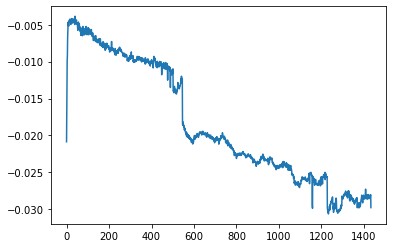

In [29]:
capteur_riviere_processed = capteur_riviere.drop(trouver_aberr(capteur_riviere, ['diff_charge']))
plt.plot(capteur_riviere_processed['diff_charge'])

On voit que pour la différence de charge, on a retiré comme prévu les valeurs très éloignées de la médiane. Par contre, on peut voir ici qu'il reste une valeur aberrante au début de la série, qui est en plein milieu de la distribution, donc qui n'a pas été repérée comme étrange.

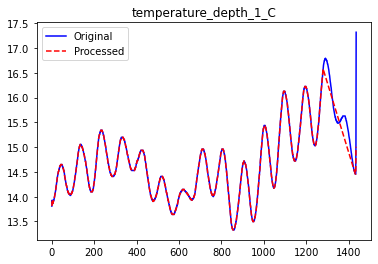

In [30]:
capteur_ZH_processed = capteur_ZH.drop(trouver_aberr(capteur_ZH, ['temperature_depth_1_C','temperature_depth_2_C','temperature_depth_3_C','temperature_depth_4_C']))

plt.title('temperature_depth_1_C')
plt.plot(capteur_ZH['temperature_depth_1_C'], c = 'b', linestyle = '-')
plt.plot(capteur_ZH_processed['temperature_depth_1_C'], c = 'r', linestyle = '--')
plt.legend(['Original', 'Processed'])



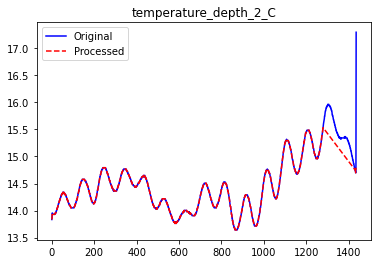

In [31]:
plt.title('temperature_depth_2_C')
plt.plot(capteur_ZH['temperature_depth_2_C'], c = 'b', linestyle = '-')
plt.plot(capteur_ZH_processed['temperature_depth_2_C'], c = 'r', linestyle = '--')
plt.legend(['Original', 'Processed'])

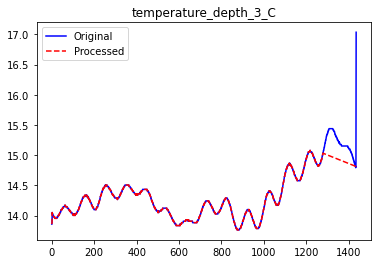

In [32]:
plt.title('temperature_depth_3_C')
plt.plot(capteur_ZH['temperature_depth_3_C'], c = 'b', linestyle = '-')
plt.plot(capteur_ZH_processed['temperature_depth_3_C'], c = 'r', linestyle = '--')
plt.legend(['Original', 'Processed'])

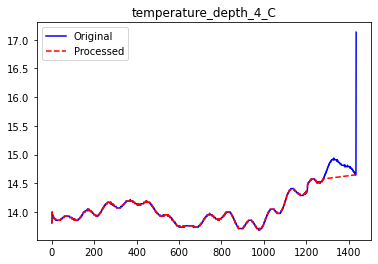

In [33]:
plt.title('temperature_depth_4_C')
plt.plot(capteur_ZH['temperature_depth_4_C'], c = 'b', linestyle = '-')
plt.plot(capteur_ZH_processed['temperature_depth_4_C'], c = 'r', linestyle = '--')
plt.legend(['Original', 'Processed'])

## Expliquez le résultat
est ce que cette méthodologie vous semble suffisante? Tentez de trouver les limites de cette méthodologie?
Que pouvez vous apportez aux fonctions afin de les améliorer?

On remarque que l'on a retiré beaucoup trop de valeurs pour les températures. C'est logique, puisque les températures varient naturellement au delà de $1.5 \cdot IQR$ au delà des quartiles d'après les graphes, mais pendant une courte période. Une manière de résoudre ce problème serait d'augmenter le facteur $1.5$. Ci-dessous, on refait le travail avec un facteur $2.5$, qui présente des résultats bien plus satisfaisants.

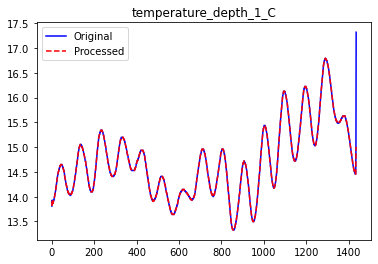

In [34]:
capteur_ZH_processed = capteur_ZH.drop(trouver_aberr(capteur_ZH,
                        ['temperature_depth_1_C','temperature_depth_2_C','temperature_depth_3_C','temperature_depth_4_C'], 2.5))

plt.title('temperature_depth_1_C')
plt.plot(capteur_ZH['temperature_depth_1_C'], c = 'b', linestyle = '-')
plt.plot(capteur_ZH_processed['temperature_depth_1_C'], c = 'r', linestyle = '--')
plt.legend(['Original', 'Processed'])

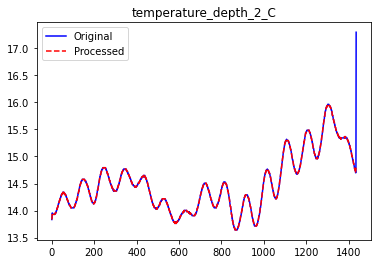

In [35]:
plt.title('temperature_depth_2_C')
plt.plot(capteur_ZH['temperature_depth_2_C'], c = 'b', linestyle = '-')
plt.plot(capteur_ZH_processed['temperature_depth_2_C'], c = 'r', linestyle = '--')
plt.legend(['Original', 'Processed'])

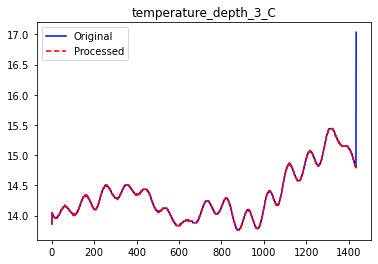

In [36]:
plt.title('temperature_depth_3_C')
plt.plot(capteur_ZH['temperature_depth_3_C'], c = 'b', linestyle = '-')
plt.plot(capteur_ZH_processed['temperature_depth_3_C'], c = 'r', linestyle = '--')
plt.legend(['Original', 'Processed'])

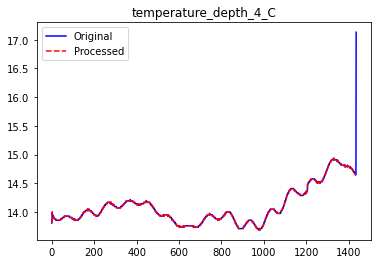

In [37]:
plt.title('temperature_depth_4_C')
plt.plot(capteur_ZH['temperature_depth_4_C'], c = 'b', linestyle = '-')
plt.plot(capteur_ZH_processed['temperature_depth_4_C'], c = 'r', linestyle = '--')
plt.legend(['Original', 'Processed'])

## Valeurs abérantes avec la méthode score Z 
Il s'agit d'une unité mesurée en écart-type. Fondamentalement, il s'agit d'une mesure de la distance entre le score brut et la moyenne. Il est compris entre -3 et +3, où 0 = moyenne et 1 = écart-type, c'est-à-dire une distribution normale.

Cette méthode suggère qu'en tout point de données il existe une relation entre l'écart-type et la moyenne. Le score Z permet de trouver la distribution des données où la moyenne est égale à 0 et l'écart-type à 1, c'est-à-dire une distribution normale. Vous devez vous demander en quoi cela peut nous aider à identifier les valeurs aberrantes ? En calculant le score Z, nous redimensionnons et centrons les données et recherchons les points de données qui sont trop éloignés de zéro. Ces points de données qui sont trop éloignés de zéro seront traités comme des valeurs aberrantes. Dans la plupart des cas, un seuil de 3 ou -3 est utilisé, c'est-à-dire que si la valeur du score Z est supérieure ou inférieure à 3 ou -3 respectivement, ce point de données sera identifié comme aberrant.

Formule pour le score Z = (Observation - Moyenne)/Écart-type

z = (X - μ) / σ

Ecrire des functions afin de pouvoir appliquer cette méthodologie aux données

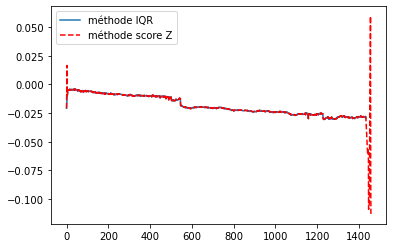

In [38]:
def process_z(df):
    return (df-df.mean())/df.std()

diff_charge_normalized = process_z(capteur_riviere['diff_charge'])
diff_charge_processed_Z = diff_charge_normalized[abs(diff_charge_normalized)<3]

sigma = capteur_riviere['diff_charge'].std()
mu = capteur_riviere['diff_charge'].mean()

plt.plot(capteur_riviere_processed['diff_charge'])
plt.plot(mu+sigma*diff_charge_processed_Z, c = 'r', linestyle = '--')
plt.legend(['méthode IQR','méthode score Z'])

Avec un seuil de 3, la méthode score Z n'est pas assez stricte pour la colonne ```diff_charge```. Avec un seuil de $1$, on retombe sur le résultat obtenu par méthode IQR.

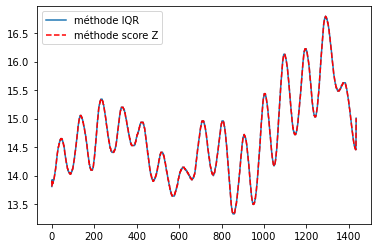

In [39]:
df = capteur_ZH[['temperature_depth_1_C']]
capteur_ZH_normalized = process_z(df)
sigma = df.std()
mu = df.mean()
capteur_ZH_processed_Z_1 = mu+sigma*capteur_ZH_normalized[abs(capteur_ZH_normalized)<3]

plt.plot(capteur_ZH_processed['temperature_depth_1_C'])
plt.plot(capteur_ZH_processed_Z_1, c = 'r', linestyle = '--')
plt.legend(['méthode IQR','méthode score Z'])

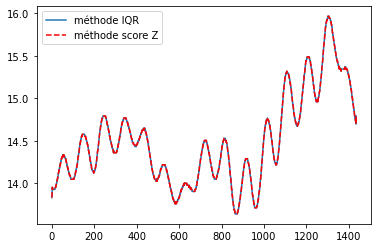

In [40]:
df = capteur_ZH[['temperature_depth_2_C']]
capteur_ZH_normalized = process_z(df)
sigma = df.std()
mu = df.mean()
capteur_ZH_processed_Z_2 = mu+sigma*capteur_ZH_normalized[abs(capteur_ZH_normalized)<3]

plt.plot(capteur_ZH_processed['temperature_depth_2_C'])
plt.plot(capteur_ZH_processed_Z_2, c = 'r', linestyle = '--')
plt.legend(['méthode IQR','méthode score Z'])

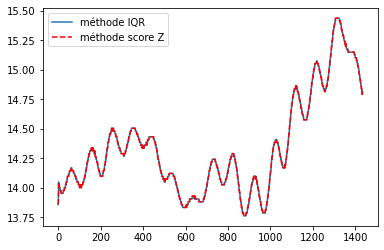

In [41]:
df = capteur_ZH[['temperature_depth_3_C']]
capteur_ZH_normalized = process_z(df)
sigma = df.std()
mu = df.mean()
capteur_ZH_processed_Z_3 = mu+sigma*capteur_ZH_normalized[abs(capteur_ZH_normalized)<3]

plt.plot(capteur_ZH_processed['temperature_depth_3_C'])
plt.plot(capteur_ZH_processed_Z_3, c = 'r', linestyle = '--')
plt.legend(['méthode IQR','méthode score Z'])

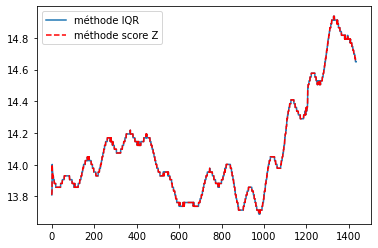

In [42]:
df = capteur_ZH[['temperature_depth_4_C']]
capteur_ZH_normalized = process_z(df)
sigma = df.std()
mu = df.mean()
capteur_ZH_processed_Z_4 = mu+sigma*capteur_ZH_normalized[abs(capteur_ZH_normalized)<3]

plt.plot(capteur_ZH_processed['temperature_depth_4_C'])
plt.plot(capteur_ZH_processed_Z_4, c = 'r', linestyle = '--')
plt.legend(['méthode IQR','méthode score Z'])

Avec un seuil de 3, la méthode score Z donne les mêmes résultats que la méthode IQR pour les températures (dont le facteur avait été augmenté à 2.5).  On doit maintenant concaténer les quatre séries et retirer les lignes avec des vides dans l'une des colonnes.

In [43]:
capteur_ZH_processed = pd.concat([capteur_ZH_processed_Z_1, capteur_ZH_processed_Z_2, capteur_ZH_processed_Z_3, capteur_ZH_processed_Z_4], axis=1).dropna()
capteur_ZH_processed

,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C
0,13.810,13.834,13.858,13.810
1,13.834,13.858,13.882,13.834
2,13.930,13.954,14.050,14.002
3,13.882,13.954,14.026,13.954
4,13.858,13.930,14.026,13.954
...,...,...,...,...
1430,14.481,14.745,14.840,14.673
1431,14.457,14.745,14.816,14.649
1432,14.457,14.721,14.816,14.649
1433,14.457,14.697,14.792,14.649


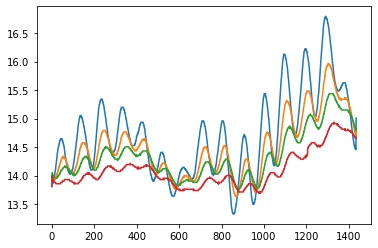

In [44]:
plt.plot(capteur_ZH_processed['temperature_depth_1_C'])
plt.plot(capteur_ZH_processed['temperature_depth_2_C'])
plt.plot(capteur_ZH_processed['temperature_depth_3_C'])
plt.plot(capteur_ZH_processed['temperature_depth_4_C'])

Le résultat est satisfaisant.

## Comparer les deux méthodologies, donner leurs avantages et leurs limitations
Vous pouvez proposer des alternatives.

Les deux méthodes sont très similaires sur leur manière de détecter les points aberrants : elles mettent en évidence les points décentrés de la distribution. Là où la méthode IQR regarde la distance à un quartile, la méthode score Z regarde la distance à la moyenne. La différence est subtile mais cela revient à faire la différence entre la moyenne et la médiane. Regarder la distance à la médiane est intéressant si on veut repérer des points qui effectuent des pics très abrupts pendant de très courts instants (la médiane n'est pas affectée par ces perturbations, alors que la moyenne sera poussée vers le haut/bas). Par contre, si la distribution est naturellement large, la méthode sera moins efficace.

En effet, ces deux méthodes sont théoriquement parfaites pour une distribution gaussienne. Or on a pu voir sur les histogrammes que nos valeurs ne suivent pas des lois normales. Ici, on a pu trouver des valeurs de seuil qui fonctionnent, mais pour traiter un grand jeu de données, ce serait inenvisageable d'ajuster les paramètres à chaque fois.

Pour corriger les valeurs aberrantes résiduelles (la valeur de début des différences de charges, qui est centrée dans la ditribution), une autre méthode complémentaire peut être envisagée : mesurer les sauts entre les valeurs. En effet, les séries ont des variations très faibles (vu qu'on prend des mesures toutes les 15 minutes, il n'y a aucune raison d'avoir des discontinuités). Une version simple d'un tel algotithme sera implémenté dans la partie suivante.

## Proposer une fonction permettant d'aller des données brutes jusqu'au premier traitement des données.

N'oubliez pas de permettre à l'utilisateur de pouvoir prendre des décisions et de l'aider à prendre ces décisions
Pensez à indiquer à l'utilisateur si le jeu de données est utilisable, quels sont les capteurs défaillant, quel semble être l'orientation des échanges nappe-rivière, les données de différence de charge semblent t'elles données les mêmes informations que les données du profils de température.

Votre function doit prendre en entrée, les trois fichiers et proposer au fur et à mesure de son dérouler des propositions à l'utilisateur.

In [45]:
etalonage_capteur_riv = pd.read_csv("C:/Users/guill/Documents/Etudes/Mines/2A/T3/Molonari/Flux d'eau et d'énergie/MOLONARI_1D_RESOURCES/configuration/pressure_sensors\P508.csv")
capteur_riviere = pd.read_csv("C:/Users/guill/Documents/Etudes/Mines/2A/T3/Molonari/Flux d'eau et d'énergie/MOLONARI_1D_RESOURCES/sampling_points/Point034/point034_P_measures.csv",
                            sep = ',', header = 0, names = ['dates', 'tension_V', 'temperature_stream_C'], usecols = [1, 2, 3], skiprows=1)
capteur_ZH = pd.read_csv("C:/Users/guill/Documents/Etudes/Mines/2A/T3/Molonari/Flux d'eau et d'énergie/MOLONARI_1D_RESOURCES/sampling_points/Point034/point034_T_measures.csv",
                            sep = ',', header = 0, names = ['dates', 'temperature_depth_1_C', 'temperature_depth_2_C', 'temperature_depth_3_C', 'temperature_depth_4_C'], usecols = [1, 2, 3, 4, 5], skiprows=1)


Pour des raisons pratiques dans le notebook, nous préférons faire plusieurs fonctions en plusieurs lignes pour l'interaction entre le programme et l'utilisateur, et non une seule fonction qui commanderait tout en chaîne, et qui ne serait pas lisible facilement sur un notebook. Nous proposons donc plutôt un protocole :
- Appliquer la fonction ```premier_nettoyage()``` après avoir importé les données comme ci-dessus.
- Appliquer la fonction ```detecteur_pic``` à toutes les colonnes et supprimer les points suspects.
- Appliquer la fonction ```fusion``` pour le résultat final :
  - Une différence de charge négative (resp. négative) signifie que l'écoulement de Darcy est vers le bas (resp. le haut).
  - Un déphasage positif (resp. négatif) entre les ondes de température indique un flux d'énergie descendant (resp. ascendant). Autrement dit, si l'onde se déplace du capteur 1 vers le capteur 4, le flux de chaleur descend vers l'aquifère, et donc l'écoulement est très probablement également descendant.

In [46]:
def creer_diff_charge(etalonage_capteur_riv, capteur_riviere):
    U0, dUdH, dUdT = float(etalonage_capteur_riv['P508'].iloc[2]), float(etalonage_capteur_riv['P508'].iloc[3]), float(etalonage_capteur_riv['P508'].iloc[4])
    capteur_riviere['diff_charge'] = (1/dUdH) * (capteur_riviere['tension_V'] - U0 - dUdT*capteur_riviere['temperature_stream_C'])

def formattage_dates(capteur_riviere, capteur_ZH):
    capteur_riviere['dates'] = pd.to_datetime(capteur_riviere['dates'], infer_datetime_format=True)
    capteur_ZH['dates'] = pd.to_datetime(capteur_ZH['dates'], infer_datetime_format=True)

def calcul_score_z(df, colonne, seuil):
    df_normalized = process_z(df[colonne])
    df_processed_Z = df_normalized[abs(df_normalized)<seuil]

    sigma = df[colonne].std()
    mu = df[colonne].mean()

    return mu+sigma*df_processed_Z

def traitement(capteur_riviere, capteur_ZH, seuil_charge, seuil_temp):

    capteur_riviere_processed = calcul_score_z(capteur_riviere, 'diff_charge', seuil_charge)

    capteur_ZH_processed_1 = calcul_score_z(capteur_ZH, 'temperature_depth_1_C', seuil_temp)
    capteur_ZH_processed_2 = calcul_score_z(capteur_ZH, 'temperature_depth_2_C', seuil_temp)
    capteur_ZH_processed_3 = calcul_score_z(capteur_ZH, 'temperature_depth_3_C', seuil_temp)
    capteur_ZH_processed_4 = calcul_score_z(capteur_ZH, 'temperature_depth_4_C', seuil_temp)

    capteur_ZH_processed_c = pd.concat([capteur_ZH_processed_1, capteur_ZH_processed_2,
                                      capteur_ZH_processed_3, capteur_ZH_processed_4], axis=1)
    capteur_ZH_processed = capteur_ZH_processed_c.dropna()

    return capteur_riviere_processed, capteur_ZH_processed

def detecteur_pic(df, colonne, alpha = 5):

    try:
        df = df[colonne]
    except:
        None

    ecarts = []
    for i in range(len(df)-1):
        ecarts += [ abs( df.iloc[i+1] - df.iloc[i] ) ]
    
    ecart_moyen = np.array(ecarts).mean()
    ecart_type = np.array(ecarts).std()


    aberr = []
    for i in range(len(ecarts)):
        if ecarts[i]>ecart_moyen+alpha*ecart_type:
            aberr.append(i)

    if aberr != []:
        print(colonne, ' - Des pics abrupts ont été détectés aux positions : ', aberr)
        print('Visualisation pour suppression éventuelle.')
        plt.plot(df)
        for i in aberr:
            plt.plot(i, df.iloc[i], 'rx')
        plt.title(colonne)
    else:
        print(colonne, ' - Aucun pic abrupt détecté.')

def premier_nettoyage(seuil_charge, seuil_temp):
    creer_diff_charge(etalonage_capteur_riv, capteur_riviere)
    formattage_dates(capteur_riviere, capteur_ZH)
    capteur_riviere_processed, capteur_ZH_processed = traitement(capteur_riviere, capteur_ZH, seuil_charge, seuil_temp)
    return capteur_riviere_processed, capteur_ZH_processed

def fusion(capteur_riviere, capteur_riviere_processed, capteur_ZH_processed):
    return pd.concat([capteur_riviere['dates'],capteur_riviere_processed, capteur_ZH_processed], axis=1).dropna()

In [47]:
capteur_riviere_processed, capteur_ZH_processed = premier_nettoyage(1,3)

diff_charge  - Des pics abrupts ont été détectés aux positions :  [0, 499, 543, 1154, 1156, 1225]
Visualisation pour suppression éventuelle.


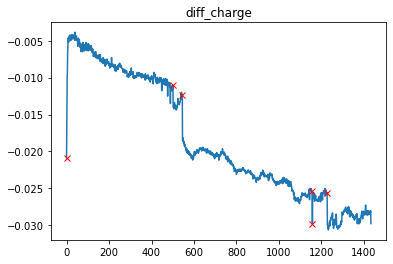

In [48]:
detecteur_pic(capteur_riviere_processed, 'diff_charge')

La fonction ```detecteur_pic``` permet de visualiser les points avec des sauts importants. On peut alors récupérer les indices dont on souhaite supprimer les lignes. On supprime ici les deux sauts les moins naturels.

In [49]:
capteur_riviere_processed = capteur_riviere_processed.drop([0, 1156])

temperature_depth_1_C  - Des pics abrupts ont été détectés aux positions :  [1433]
Visualisation pour suppression éventuelle.


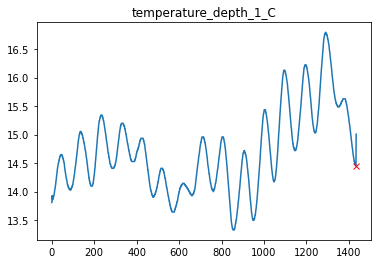

In [50]:
detecteur_pic(capteur_ZH_processed, 'temperature_depth_1_C')

temperature_depth_2_C  - Des pics abrupts ont été détectés aux positions :  [1, 1433]
Visualisation pour suppression éventuelle.


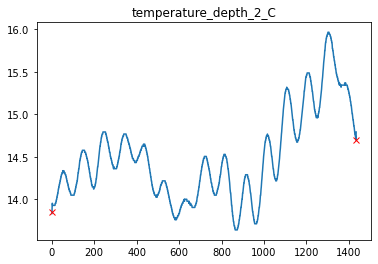

In [51]:
detecteur_pic(capteur_ZH_processed, 'temperature_depth_2_C')

temperature_depth_3_C  - Des pics abrupts ont été détectés aux positions :  [1]
Visualisation pour suppression éventuelle.


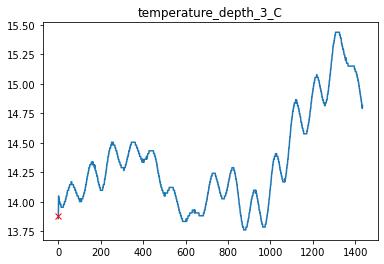

In [52]:
detecteur_pic(capteur_ZH_processed, 'temperature_depth_3_C')

temperature_depth_4_C  - Des pics abrupts ont été détectés aux positions :  [1, 1205]
Visualisation pour suppression éventuelle.


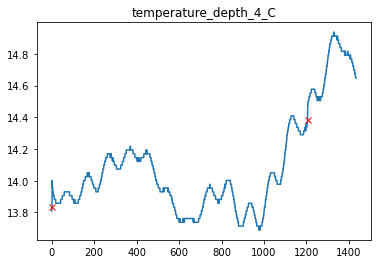

In [53]:
detecteur_pic(capteur_ZH_processed, 'temperature_depth_4_C')

Pas de sauts trop problématiques pour les températures. Il ne reste qu'à fusionner les tables.

In [54]:
resultat_P034 = fusion(capteur_riviere, capteur_riviere_processed, capteur_ZH_processed)

Text(0.5, 1.0, 'diff_charge')

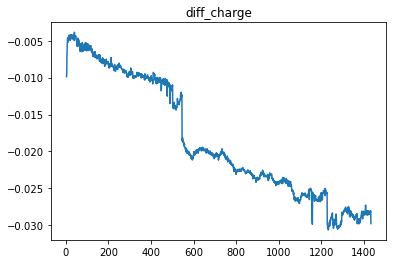

In [55]:
plt.plot(resultat_P034['diff_charge'])
plt.title('diff_charge')

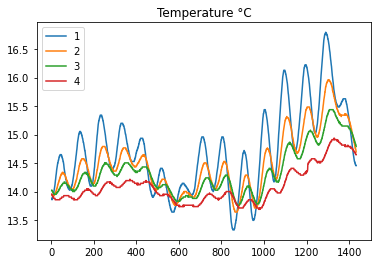

In [56]:
plt.plot(resultat_P034['temperature_depth_1_C'])
plt.plot(resultat_P034['temperature_depth_2_C'])
plt.plot(resultat_P034['temperature_depth_3_C'])
plt.plot(resultat_P034['temperature_depth_4_C'])
plt.title('Temperature °C')
plt.legend(['1','2','3','4'])

On voit que les ondes de température se déplacent du capteur 1 vers le capteur 4 : donc vers le bas. On peut donc dire que le flux de chaleur est descendant. Par ailleurs, la différence de charge est négative. Cela signifie que le flux de darcy est dirigé vers le bas. Ainsi, dans ce cas, l'écoulement est descendant, vers l'aquifère.

# Deux autres jeux de données sont disponibles sur le répertoire github.
Votre rôle est de traiter et d'analyser ces données avec la méthodologie que vous avez développé

### Point 46

In [57]:
etalonage_capteur_riv = pd.read_csv("C:/Users/guill/Documents/Etudes/Mines/2A/T3/Molonari/Flux d'eau et d'énergie/MOLONARI_1D_RESOURCES/configuration/pressure_sensors\P508.csv")
capteur_riviere = pd.read_csv("C:/Users/guill/Documents/Etudes/Mines/2A/T3/Molonari/Flux d'eau et d'énergie/MOLONARI_1D_RESOURCES/sampling_points/Point046/point046_P_measures.csv",
                            sep = ',', header = 0, names = ['dates', 'tension_V', 'temperature_stream_C'], usecols = [1, 2, 3], skiprows=1)
capteur_ZH = pd.read_csv("C:/Users/guill/Documents/Etudes/Mines/2A/T3/Molonari/Flux d'eau et d'énergie/MOLONARI_1D_RESOURCES/sampling_points/Point046/point046_T_measures.csv",
                            sep = '\t', header = 0, names = ['dates', 'temperature_depth_1_C', 'temperature_depth_2_C', 'temperature_depth_3_C', 'temperature_depth_4_C'], usecols = [1, 2, 3, 4, 5], skiprows=1)


In [58]:
capteur_riviere_processed, capteur_ZH_processed = premier_nettoyage(3,3)

diff_charge  - Des pics abrupts ont été détectés aux positions :  [275, 443, 482, 483, 484, 493, 498, 499, 500, 506, 508, 512, 522, 523, 536, 1325, 1396, 1397]
Visualisation pour suppression éventuelle.


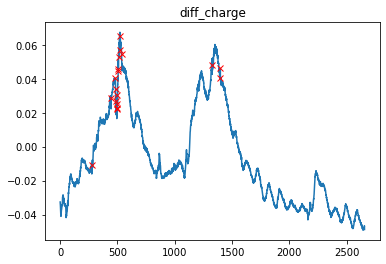

In [59]:
detecteur_pic(capteur_riviere_processed, 'diff_charge')

temperature_depth_1_C  - Des pics abrupts ont été détectés aux positions :  [1435, 1615]
Visualisation pour suppression éventuelle.


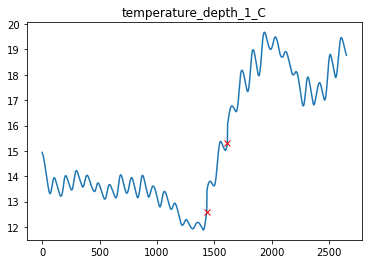

In [60]:
detecteur_pic(capteur_ZH_processed, 'temperature_depth_1_C')

temperature_depth_2_C  - Des pics abrupts ont été détectés aux positions :  [212, 374]
Visualisation pour suppression éventuelle.


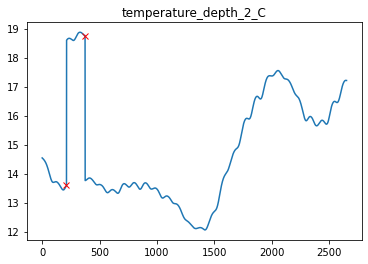

In [61]:
detecteur_pic(capteur_ZH_processed, 'temperature_depth_2_C')

In [62]:
detecteur_pic(capteur_ZH_processed, 'temperature_depth_3_C')

temperature_depth_3_C  - Aucun pic abrupt détecté.


In [63]:
detecteur_pic(capteur_ZH_processed, 'temperature_depth_4_C')

temperature_depth_4_C  - Aucun pic abrupt détecté.


In [64]:
resultat_P046 = fusion(capteur_riviere, capteur_riviere_processed, capteur_ZH_processed)

In [65]:
resultat_P046

,dates,diff_charge,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C
0,2019-06-17 12:00:00,-0.032607,14.939745,14.539013,13.992032,13.745
1,2019-06-17 12:15:00,-0.033687,14.922644,14.534254,14.003145,13.759
2,2019-06-17 12:30:00,-0.034682,14.907737,14.530336,14.010865,13.772
3,2019-06-17 12:45:00,-0.036975,14.893871,14.526738,14.016747,13.786
4,2019-06-17 13:00:00,-0.039292,14.880377,14.523217,14.021637,13.798
...,...,...,...,...,...,...
2650,2019-07-15 02:30:00,-0.048847,18.800598,17.212676,17.061445,16.978
2651,2019-07-15 02:45:00,-0.048722,18.789894,17.212035,17.064139,16.966
2652,2019-07-15 03:00:00,-0.047780,18.781030,17.211171,17.066461,16.955
2653,2019-07-15 03:15:00,-0.047704,18.774305,17.210114,17.068424,16.945


Text(0.5, 1.0, 'diff_charge')

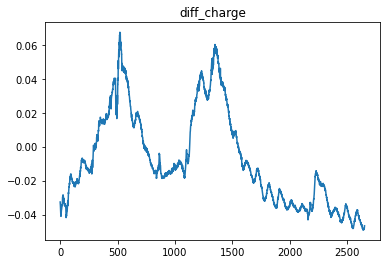

In [66]:
plt.plot(resultat_P046['diff_charge'])
plt.title('diff_charge')

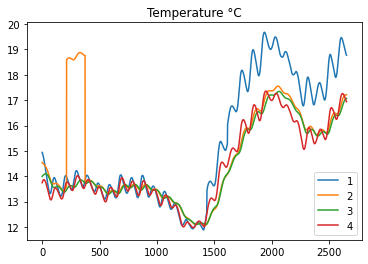

In [67]:
plt.plot(resultat_P046['temperature_depth_1_C'])
plt.plot(resultat_P046['temperature_depth_2_C'])
plt.plot(resultat_P046['temperature_depth_3_C'])
plt.plot(resultat_P046['temperature_depth_4_C'])
plt.title('Temperature °C')
plt.legend(['1','2','3','4'])

In [68]:
resultat_P046['dates']

0      2019-06-17 12:00:00
1      2019-06-17 12:15:00
2      2019-06-17 12:30:00
3      2019-06-17 12:45:00
4      2019-06-17 13:00:00
               ...        
2650   2019-07-15 02:30:00
2651   2019-07-15 02:45:00
2652   2019-07-15 03:00:00
2653   2019-07-15 03:15:00
2654   2019-07-15 03:30:00
Name: dates, Length: 2655, dtype: datetime64[ns]

Au point 46, on peut voir que l'écoulement est dirigé vers le bas sauf pendant deux courtes périodes où l'eau remonte. Quant aux températures, en ignorant le pic de la courbe orange, on peut voir deux périodes différentes. La première moitié de la série consiste en une très bonne corrélation des quatre capteurs (ce qui peut signifier que le milieu est très perméable), et sur la deuxième partie, on peut émettre deux hypothèses : le début du mois de juillet a fait augmenter les températures et a engendré un fort découplage entre le premier capteur et les suivants, qui subissent des variations de températures de formes différentes... deuxièmement, on peut aussi penser qu'il y a eu soit une anomalie au niveau du premier capteur, soit des trois suivants.

### Point 47

In [69]:
etalonage_capteur_riv = pd.read_csv("C:/Users/guill/Documents/Etudes/Mines/2A/T3/Molonari/Flux d'eau et d'énergie/MOLONARI_1D_RESOURCES/configuration/pressure_sensors\P508.csv")
capteur_riviere = pd.read_csv("C:/Users/guill/Documents/Etudes/Mines/2A/T3/Molonari/Flux d'eau et d'énergie/MOLONARI_1D_RESOURCES/sampling_points/Point047/point047_P_measures.csv",
                            sep = ',', header = 0, names = ['dates', 'tension_V', 'temperature_stream_C'], usecols = [1, 2, 3], skiprows=1)
capteur_ZH = pd.read_csv("C:/Users/guill/Documents/Etudes/Mines/2A/T3/Molonari/Flux d'eau et d'énergie/MOLONARI_1D_RESOURCES/sampling_points/Point047/point047_T_measures.csv",
                            sep = ',', header = 0, names = ['dates', 'temperature_depth_1_C', 'temperature_depth_2_C', 'temperature_depth_3_C', 'temperature_depth_4_C'], usecols = [1, 2, 3, 4, 5], skiprows=1)


In [70]:
capteur_riviere_processed, capteur_ZH_processed = premier_nettoyage(3,1.5)

diff_charge  - Des pics abrupts ont été détectés aux positions :  [122, 275, 335, 443, 444, 448, 482, 483, 484, 493, 498, 499, 500, 506, 508, 512, 522, 523, 536, 1325, 1396, 1397]
Visualisation pour suppression éventuelle.


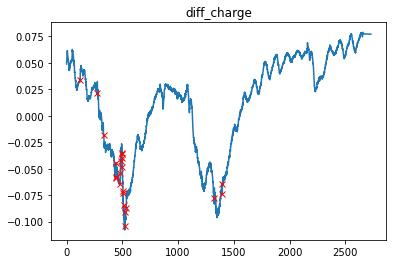

In [71]:
detecteur_pic(capteur_riviere_processed, 'diff_charge')

temperature_depth_1_C  - Des pics abrupts ont été détectés aux positions :  [1574]
Visualisation pour suppression éventuelle.


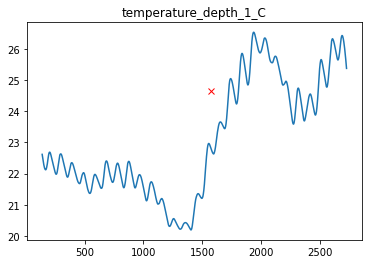

In [72]:
detecteur_pic(capteur_ZH_processed, 'temperature_depth_1_C')

temperature_depth_2_C  - Des pics abrupts ont été détectés aux positions :  [33]
Visualisation pour suppression éventuelle.


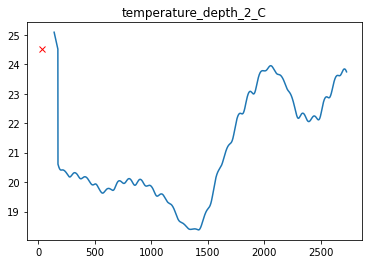

In [73]:
detecteur_pic(capteur_ZH_processed, 'temperature_depth_2_C')

temperature_depth_3_C  - Des pics abrupts ont été détectés aux positions :  [1574]
Visualisation pour suppression éventuelle.


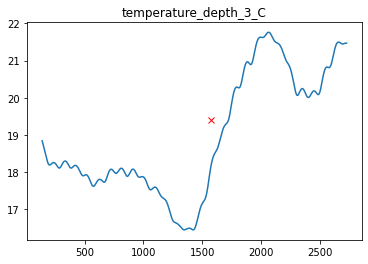

In [74]:
detecteur_pic(capteur_ZH_processed, 'temperature_depth_3_C')

temperature_depth_4_C  - Des pics abrupts ont été détectés aux positions :  [530, 1574]
Visualisation pour suppression éventuelle.


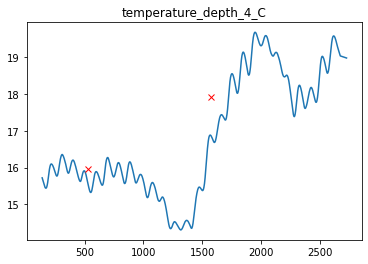

In [75]:
detecteur_pic(capteur_ZH_processed, 'temperature_depth_4_C')

In [76]:
resultat_P047 = fusion(capteur_riviere, capteur_riviere_processed, capteur_ZH_processed)
resultat_P047

,dates,diff_charge,temperature_depth_1_C,temperature_depth_2_C,temperature_depth_3_C,temperature_depth_4_C
139,2019-08-29 00:45:00,0.042189,22.614026,25.084533,18.845352,15.721000
140,2019-08-29 01:00:00,0.042984,22.588786,25.066894,18.833837,15.710000
141,2019-08-29 01:15:00,0.042758,22.563707,25.049205,18.822248,15.700000
142,2019-08-29 01:30:00,0.041753,22.538730,25.031468,18.810582,15.689000
143,2019-08-29 01:45:00,0.042173,22.513877,25.013685,18.798836,15.678000
...,...,...,...,...,...,...
2724,2019-09-24 23:00:00,0.077171,25.545741,23.778700,21.471666,18.990461
2725,2019-09-24 23:15:00,0.077167,25.502530,23.770195,21.471414,18.989389
2726,2019-09-24 23:30:00,0.077163,25.458684,23.761153,21.471003,18.988317
2727,2019-09-24 23:45:00,0.077159,25.414220,23.751581,21.470428,18.987244


Text(0.5, 1.0, 'diff_charge')

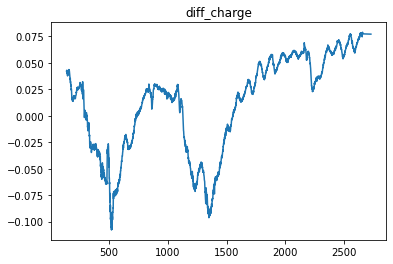

In [77]:
plt.plot(resultat_P047['diff_charge'])
plt.title('diff_charge')

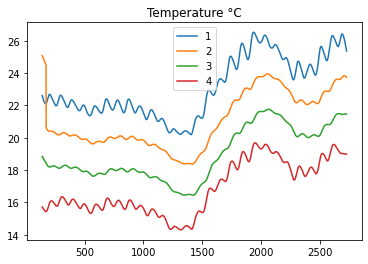

In [78]:
plt.plot(resultat_P047['temperature_depth_1_C'])
plt.plot(resultat_P047['temperature_depth_2_C'])
plt.plot(resultat_P047['temperature_depth_3_C'])
plt.plot(resultat_P047['temperature_depth_4_C'])
plt.title('Temperature °C')
plt.legend(['1','2','3','4'])

Encore une fois, les flux de darcy sont majoritairement descendants, sauf à la fin de la période de mesure. Pour les températures, on observe une forte différence de température entre les capteurs, ce qui peut signifier que le milieu est très peu conducteur thermique. On peut néanmoins relever les oscillations journalières de température au niveau du dernier capteur. Ce qui est étrange, c'est que les variations du quatrième capteur sont plus fortes que celles du 2e et du 3e. C'est physiquement peu probable et cela laisse penser que les capteurs 2 et 3 ont perdu en sensibilité. Ils suivent la tendance globale mais ne sont pas très sensibles aux variations rapides de quelques dixièmes de degrés.

## Conclusion

Dans ce TP, nous avons appris des méthodes simples et rapides pour récupérer et préparer le traitement des séries temporelles. Les méthodes IQR et score Z pour trouver les points aberrants sont un premier pas mais si l'on veut un jeu de données parfait, des méthodes plus rapprochées de la réalité physiques doivent être envisagées (détection de discontinuités non naturelles...). Quoi qu'il en soit, quelques points aberrants en début ou fin de série ne sont pas si problématiques pour effectuer des interprétations à l'oeil nu. Cela peut néanmoins perturber une éventuelle analyse spectrale.

Ensuite, pour l'interprétation des courbes, nous avons décidé de rester dans une interprétation humaine par simplicité. Il est tout à fait possible d'aller calculer les déphasages entre les signaux ondulatoires de température par analyse spectrale, mais cela nécessite d'être certain de la qualité des données. Or, là où les séries du point 34 semblent correctes, certains capteurs des points 46 et 47 semblent être defaillants. 